In [173]:
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
from scipy.signal import argrelextrema
import numpy as np
from statsmodels.nonparametric.smoothers_lowess import lowess


In [174]:
ticket = 'AAPL'
start_date = '2000-01-01'
end_date = '2005-01-01'
data = yf.download(ticket, start=start_date, end=end_date, interval='1d')
data.columns = data.columns.droplevel(1)

print(data.head())


[*********************100%***********************]  1 of 1 completed

Price       Adj Close     Close      High       Low      Open     Volume
Date                                                                    
2000-01-03   0.843077  0.999442  1.004464  0.907924  0.936384  535796800
2000-01-04   0.771997  0.915179  0.987723  0.903460  0.966518  512377600
2000-01-05   0.783293  0.928571  0.987165  0.919643  0.926339  778321600
2000-01-06   0.715509  0.848214  0.955357  0.848214  0.947545  767972800
2000-01-07   0.749401  0.888393  0.901786  0.852679  0.861607  460734400


C:\Users\khanh\AppData\Local\Temp\ipykernel_1868\791050817.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data['Local_Max'] = data['Close'][argrelextrema(data['Close'].values, np.greater, order=5)[0]]
C:\Users\khanh\AppData\Local\Temp\ipykernel_1868\791050817.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data['Local_Min'] = data['Close'][argrelextrema(data['Close'].values, np.less, order=5)[0]]


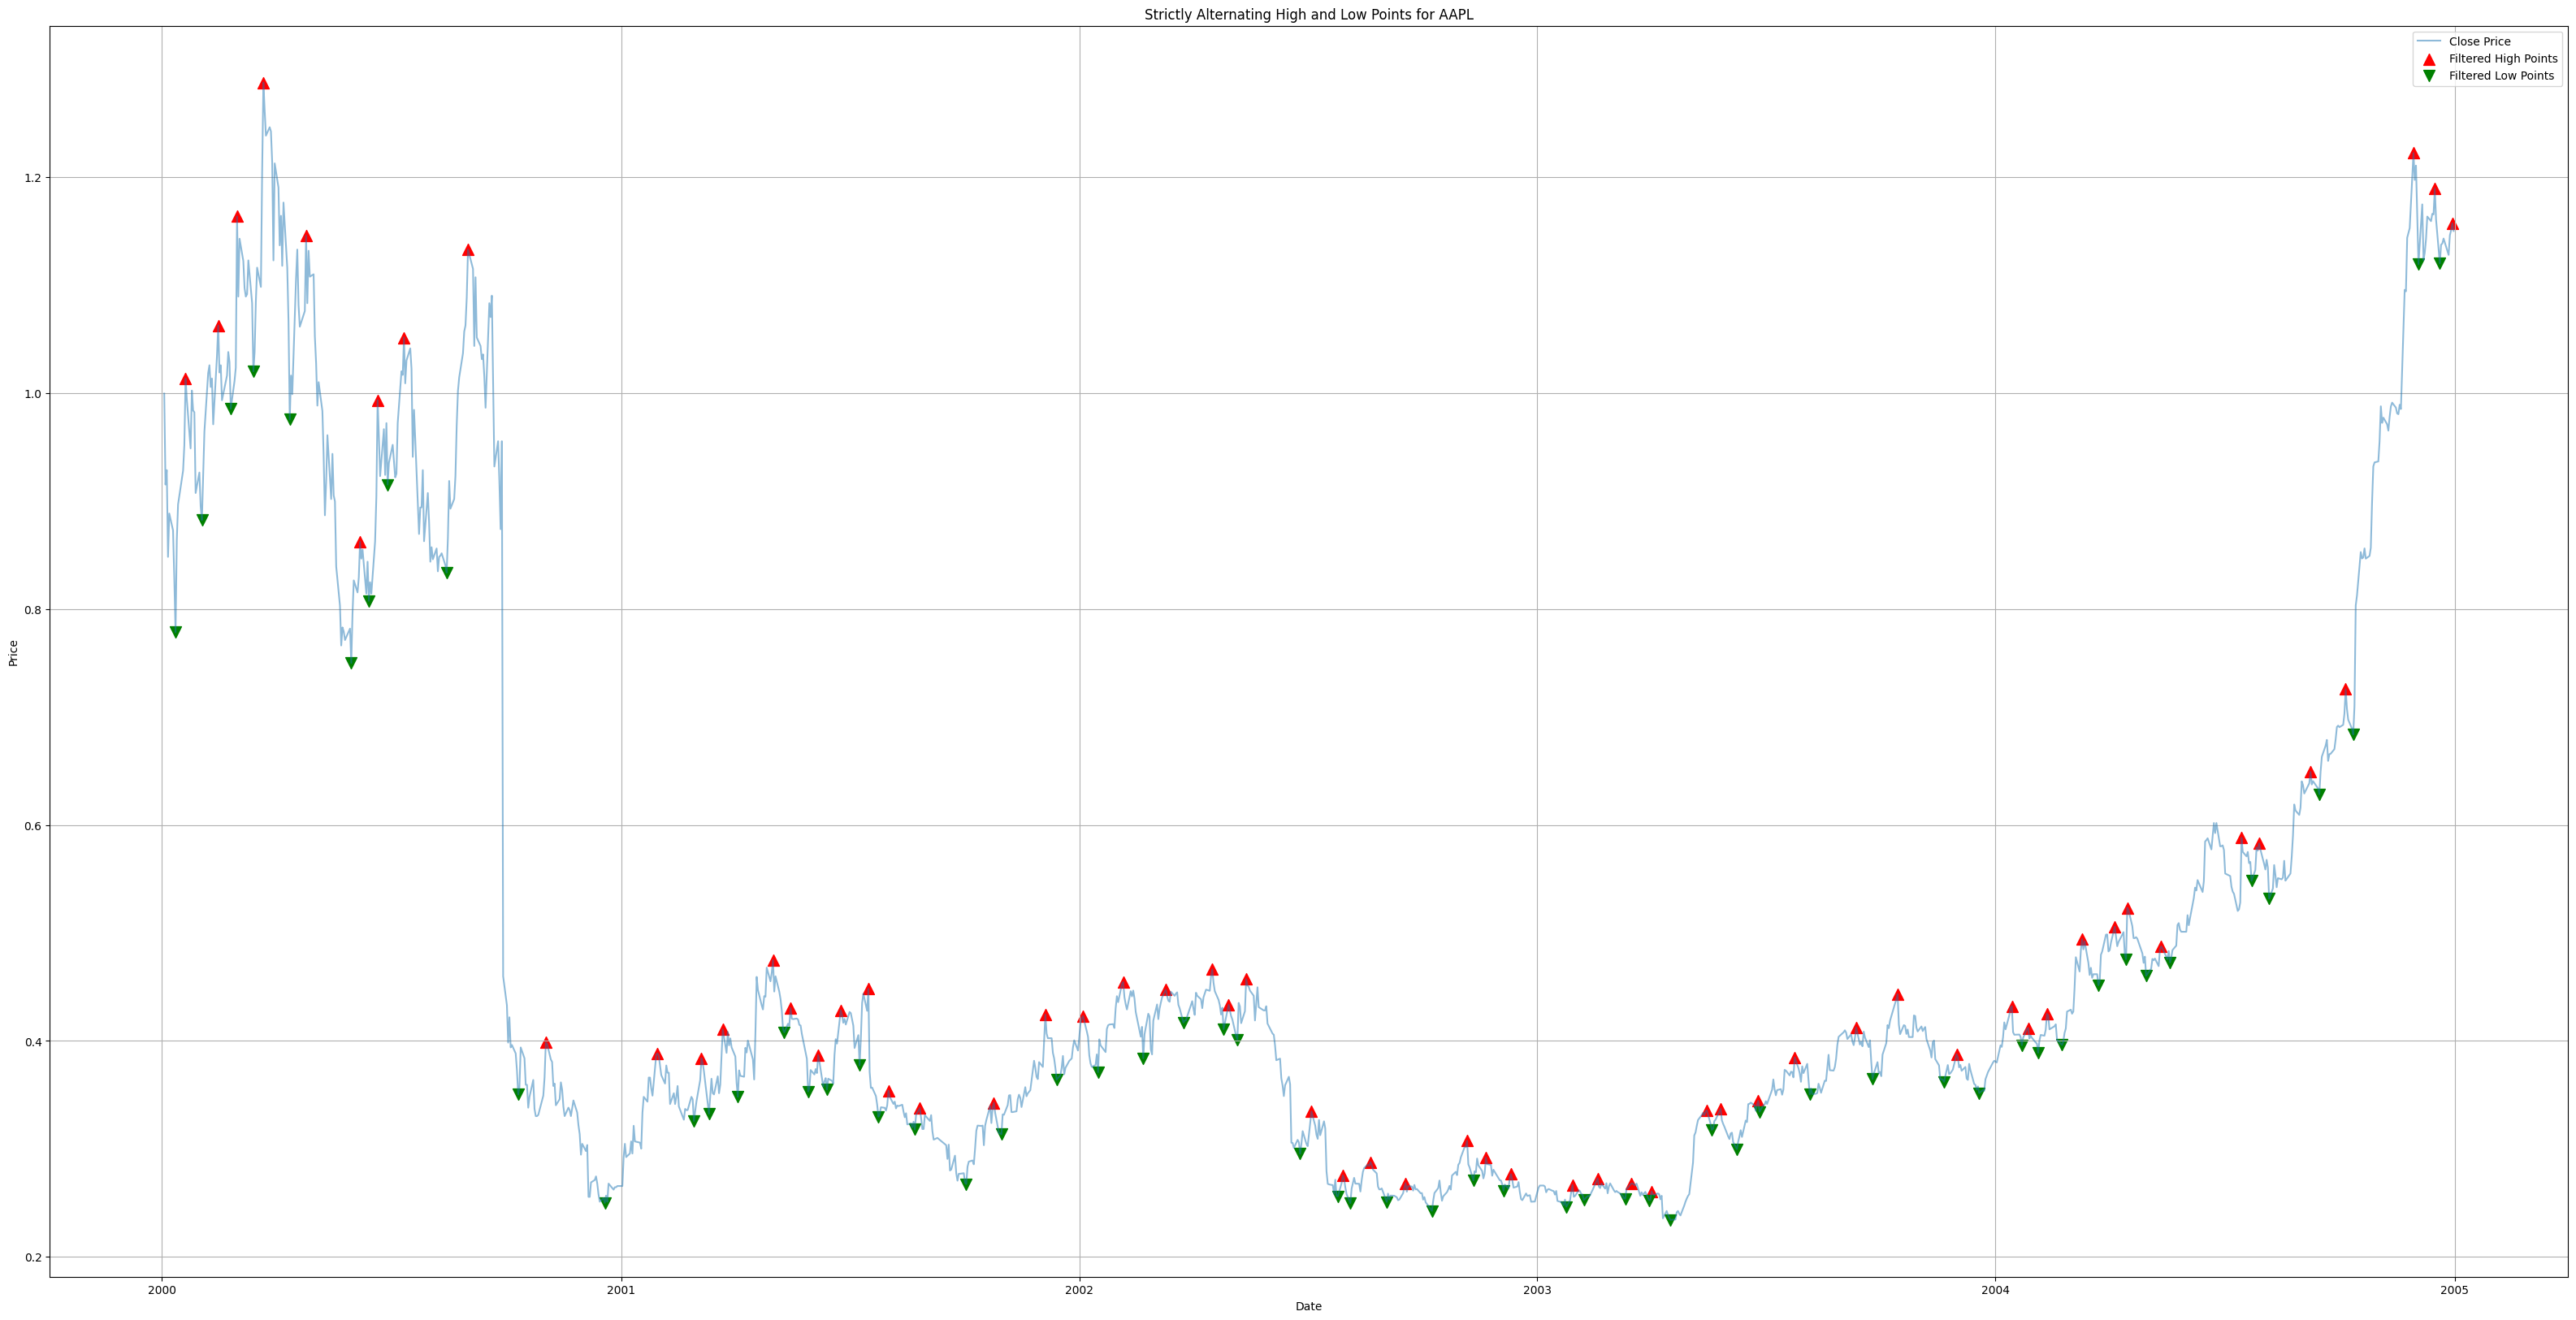

In [175]:
from scipy.signal import argrelextrema

# Find local maxima (high points) and minima (low points)
data['Local_Max'] = data['Close'][argrelextrema(data['Close'].values, np.greater, order=5)[0]]
data['Local_Min'] = data['Close'][argrelextrema(data['Close'].values, np.less, order=5)[0]]

# Function to enforce strict alternation of extrema
def enforce_strict_alternation(df, low_col='Local_Min', high_col='Local_Max'):
    """
    Removes consecutive lows or highs, keeping the lowest low or highest high
    and ensuring strict alternation between lows and highs.
    """
    extrema_points = []  # List to store the final filtered points

    for i in df.index:
        if not pd.isna(df.at[i, low_col]):  # Low point found
            if not extrema_points or extrema_points[-1][1] == 'high':  # Add if no previous point or last was a high
                extrema_points.append((i, 'low'))
            elif extrema_points[-1][1] == 'low':  # Replace if consecutive lows, keep the lower
                if df.at[extrema_points[-1][0], low_col] > df.at[i, low_col]:
                    extrema_points[-1] = (i, 'low')
        elif not pd.isna(df.at[i, high_col]):  # High point found
            if not extrema_points or extrema_points[-1][1] == 'low':  # Add if no previous point or last was a low
                extrema_points.append((i, 'high'))
            elif extrema_points[-1][1] == 'high':  # Replace if consecutive highs, keep the higher
                if df.at[extrema_points[-1][0], high_col] < df.at[i, high_col]:
                    extrema_points[-1] = (i, 'high')

    # Split the filtered points into separate high and low dataframes
    lows_filtered = df.loc[[i for i, t in extrema_points if t == 'low'], ['Close', low_col]].dropna()
    highs_filtered = df.loc[[i for i, t in extrema_points if t == 'high'], ['Close', high_col]].dropna()

    return lows_filtered, highs_filtered

# Apply the strict alternation enforcement
filtered_low_points, filtered_high_points = enforce_strict_alternation(data)

# Plot the data with strictly alternating high/low points
plt.figure(figsize=(40, 20))
plt.plot(data['Close'], label='Close Price', alpha=0.5)
plt.scatter(filtered_high_points.index, filtered_high_points['Close'], color='red', label='Filtered High Points', s=100, marker='^')
plt.scatter(filtered_low_points.index, filtered_low_points['Close'], color='green', label='Filtered Low Points', s=100, marker='v')
plt.title(f"Strictly Alternating High and Low Points for {ticket}")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()


[*********************100%***********************]  1 of 1 completed
C:\Program Files\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0132 - val_loss: 0.0028
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.1657e-04 - val_loss: 0.0027
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 4.1210e-04 - val_loss: 0.0022
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.9154e-04 - val_loss: 0.0022
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3.2607e-04 - val_loss: 0.0018
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.5086e-04 - val_loss: 0.0016
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.6382e-04 - val_loss: 0.0016
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.4839e-04 - val_loss: 0.0016
Epoch 9/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.0752e-04 - val_loss: 0.0023
Epoch 10/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.0992e-04 - val_loss: 0.0017
Epoch 11/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.1836e-04 - val_loss: 0.0016
Epoch 12/20
62/62 ━━━━━

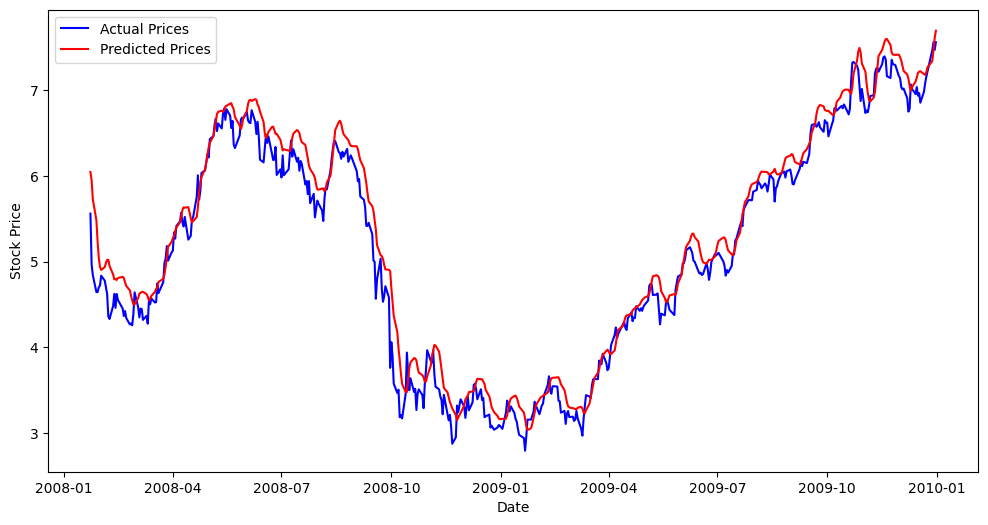

In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load dataset
ticket = 'AAPL'
start_date = '2000-01-01'
end_date = '2010-01-01'
data = yf.download(ticket, start=start_date, end=end_date, interval='1d')
# Flatten multi-level columns
data.columns = ['_'.join(col).strip() for col in data.columns.values]

# Remove '_AAPL' or similar suffixes from column names
data.columns = [col.replace('_AAPL', '') for col in data.columns]

# Use 'Close' prices for prediction
close_prices = data['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

# Create training data
def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:i + time_step, 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_sequences(scaled_data, time_step)

# Reshape X for LSTM input (samples, time_steps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test))

# Predict on test data
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))

# Inverse scale actual prices
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(y_test):], y_test_actual, label='Actual Prices', color='blue')
plt.plot(data.index[-len(y_test):], predictions, label='Predicted Prices', color='red')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()




In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense
import yfinance as yf
from xgboost import XGBRegressor

# Load dataset
ticket = 'AAPL'
start_date = '2000-01-01'
end_date = '2001-01-01'
data = yf.download(ticket, start=start_date, end=end_date, interval='1d')
# Flatten multi-level columns
data.columns = ['_'.join(col).strip() for col in data.columns.values]

# Remove '_AAPL' or similar suffixes from column names
data.columns = [col.replace('_AAPL', '') for col in data.columns]

# Use 'Close' prices for prediction
close_prices = data['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

# Create sequences for LSTM
def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:i + time_step, 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_sequences(scaled_data, time_step)

# Reshape X for LSTM input (samples, time_steps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define the LSTM model using Functional API
input_layer = Input(shape=(X_train.shape[1], 1))
lstm_layer_1 = LSTM(50, return_sequences=True)(input_layer)
lstm_layer_2 = LSTM(50, return_sequences=False)(lstm_layer_1)
dense_layer_1 = Dense(25)(lstm_layer_2)
output_layer = Dense(1)(dense_layer_1)

# Define the full model
lstm_model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
lstm_model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test))

# Extract features from the first LSTM layer
intermediate_model = Model(inputs=lstm_model.input, outputs=lstm_layer_1)
lstm_features_train = intermediate_model.predict(X_train)
lstm_features_test = intermediate_model.predict(X_test)

# Add external features for XGBoost (optional, e.g., moving averages, RSI)
additional_features = pd.DataFrame({
    'Moving_Avg': data['Close'].rolling(window=5).mean().values,
    'RSI': (100 - (100 / (1 + (data['Close'].diff(1).clip(lower=0).rolling(14).mean() /
                              data['Close'].diff(1).clip(upper=0).abs().rolling(14).mean())))),
}).fillna(0).values

# Align additional features with LSTM outputs
additional_features_train = additional_features[time_step:train_size + time_step]
additional_features_test = additional_features[train_size + time_step:]

# Combine LSTM features and additional features for XGBoost
X_train_combined = np.hstack((lstm_features_train.reshape(lstm_features_train.shape[0], -1), additional_features_train))
X_test_combined = np.hstack((lstm_features_test.reshape(lstm_features_test.shape[0], -1), additional_features_test))

# Train the XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)
xgb_model.fit(X_train_combined, y_train)

# Predict using XGBoost
xgb_predictions = xgb_model.predict(X_test_combined)

# Rescale predictions and actual values
xgb_predictions_rescaled = scaler.inverse_transform(xgb_predictions.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(y_test):], y_test_actual, label='Actual Prices', color='blue')
plt.plot(data.index[-len(y_test):], xgb_predictions_rescaled, label='Hybrid Predictions', color='red')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed

Epoch 1/20


5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 0.3551 - val_loss: 0.0100
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0553 - val_loss: 0.0610
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0561 - val_loss: 0.0260
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0246 - val_loss: 0.0195
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0291 - val_loss: 0.0276
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0218 - val_loss: 0.0377
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0251 - val_loss: 0.0337
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0173 - val_loss: 0.0254
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0186 - val_loss: 0.0206
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0160 - val_loss: 0.0208
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0138 - val_loss: 0.0197
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0149 - val_loss: 0.0138
Epoch 13/20


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 39 and the array at index 1 has size 40